In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

In [11]:
#导入文件
Bikedata=pd.read_csv(r'H:\阿里云\共享单车\train.csv')
Bikedata.head()

datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1

In [12]:
#查看个字段数据类型，缺失值情况
Bikedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
datetime      10886 non-null object
season        10886 non-null int64
holiday       10886 non-null int64
workingday    10886 non-null int64
weather       10886 non-null int64
temp          10886 non-null float64
atemp         10886 non-null float64
humidity      10886 non-null int64
windspeed     10886 non-null float64
casual        10886 non-null int64
registered    10886 non-null int64
count         10886 non-null int64
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.6+ KB


In [4]:
#我们可以看到，数据共10886行，12列，各自段均无缺失值

In [ ]:
#2.数据处理
#datetime字段是日期格式，可以进一步处理，得到年、月、日、时、周几等信息；气温，体表温度，湿度，风速字段是连续变量，需要离散化处理后分析

In [14]:
Bikedata.datetime.head()

0    2011-01-01 00:00:00
1    2011-01-01 01:00:00
2    2011-01-01 02:00:00
3    2011-01-01 03:00:00
4    2011-01-01 04:00:00
Name: datetime, dtype: object

In [21]:
#对日期型变量进行处理
def split_data(x):
    #print(x)
    return x.split()[0]
Bikedata['date']=Bikedata.datetime.map(split_data)
Bikedata['date'].head()

0    2011-01-01
1    2011-01-01
2    2011-01-01
3    2011-01-01
4    2011-01-01
Name: date, dtype: object

In [24]:
#自定义函数获取时间

split_hour=lambda x:x.split()[1].split(':')[0]
Bikedata['hour']=Bikedata.datetime.map(split_hour)
Bikedata['hour'].head()
#转换为数值型
Bikedata['hour']=Bikedata.hour.map(lambda x:int(x))
Bikedata['hour'].head()


0    0
1    1
2    2
3    3
4    4
Name: hour, dtype: int64

In [39]:
#定义函数获取日期对应的星期几
from datetime import datetime,date,time
def get_weekday(x):
#     print(x)
    dateStr=x.split()[0]
    #print(dateStr)
    dateDT=datetime.strptime(dateStr,'%Y-%m-%d')
#     print(dateDT)
    week_day=dateDT.isoweekday()
    #print(week_day)
    return week_day
Bikedata['weekday']=Bikedata.datetime.map(get_weekday)
Bikedata.weekday.head(20)

0     6
1     6
2     6
3     6
4     6
5     6
6     6
7     6
8     6
9     6
10    6
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
Name: weekday, dtype: int64

In [51]:
#同样定义函数获取对应的月份

Bikedata['month']=Bikedata.date.map(lambda x:x.split('-')[1])

#转换为数值型
Bikedata['month']=Bikedata['month'].astype(int)
Bikedata['month'].head()

0    1
1    1
2    1
3    1
4    1
Name: month, dtype: int32

In [52]:
a=Bikedata.describe()
a
#df.describe()：查看数据值列的汇总统计

season       holiday    workingday       weather         temp  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.00000   
mean       2.506614      0.028569      0.680875      1.418427     20.23086   
std        1.116174      0.166599      0.466159      0.633839      7.79159   
min        1.000000      0.000000      0.000000      1.000000      0.82000   
25%        2.000000      0.000000      0.000000      1.000000     13.94000   
50%        3.000000      0.000000      1.000000      1.000000     20.50000   
75%        4.000000      0.000000      1.000000      2.000000     26.24000   
max        4.000000      1.000000      1.000000      4.000000     41.00000   

              atemp      humidity     windspeed        casual    registered  \
count  10886.000000  10886.000000  10886.000000  10886.000000  10886.000000   
mean      23.655084     61.886460     12.799395     36.021955    155.552177   
std        8.474601     19.245033      8.164537     49.960477    151.039033   
min        0.760000      0.000000      0.000000      0.000000      0.000000   
25%       16.665000     47.000000      7.001500      4.000000     36.000000   
50%       24.240000     62.000000     12.998000     17.000000    118.000000   
75%       31.060000     77.000000     16.997900     49.000000    222.000000   
max       45.455000    100.000000     56.996900    367.000000    886.000000   

              count          hour       weekday         month  
count  10886.000000  10886.000000  10886.000000  10886.000000  
mean     191.574132     11.541613      4.013963      6.521495  
std      181.144454      6.915838      2.004585      3.444373  
min        1.000000      0.000000      1.000000      1.000000  
25%       42.000000      6.000000      2.000000      4.000000  
50%      145.000000     12.000000      4.000000      7.000000  
75%      284.000000     18.000000      6.000000     10.000000  
max      977.000000     23.000000      7.000000     12.000000

In [56]:
#相关性分析
correlation=Bikedata.corr()
correlation
#df.corr()：返回列与列之间的相关系数

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   
hour       -0.006546 -0.000354    0.002780 -0.022740  0.145430  0.140343   
weekday    -0.010553 -0.191832   -0.704267 -0.047692 -0.038466 -0.040235   
month       0.971524  0.001731   -0.003394  0.012144  0.257589  0.264173   

            humidity  windspeed    casual  registered     count      hour  \
season      0.190610  -0.147121  0.096758    0.164011  0.163439 -0.006546   
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393 -0.000354   
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  0.002780   
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655 -0.022740   
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  0.145430   
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  0.140343   
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371 -0.278011   
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  0.146631   
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  0.302045   
registered -0.265458   0.091052  0.497250    1.000000  0.970948  0.380540   
count      -0.317371   0.101369  0.690414    0.970948  1.000000  0.400601   
hour       -0.278011   0.146631  0.302045    0.380540  0.400601  1.000000   
weekday    -0.026507  -0.024804  0.246959   -0.084427 -0.002283 -0.002925   
month       0.204537  -0.150192  0.092722    0.169451  0.166862 -0.006818   

             weekday     month  
season     -0.010553  0.971524  
holiday    -0.191832  0.001731  
workingday -0.704267 -0.003394  
weather    -0.047692  0.012144  
temp       -0.038466  0.257589  
atemp      -0.040235  0.264173  
humidity   -0.026507  0.204537  
windspeed  -0.024804 -0.150192  
casual      0.246959  0.092722  
registered -0.084427  0.169451  
count      -0.002283  0.166862  
hour       -0.002925 -0.006818  
weekday     1.000000 -0.002266  
month      -0.002266  1.000000

In [58]:
correlation.astype(float).corr()

season   holiday  workingday   weather      temp     atemp  \
season      1.000000 -0.050953   -0.003356 -0.123965  0.247184  0.263717   
holiday    -0.050953  1.000000   -0.282946 -0.048365 -0.108115 -0.109539   
workingday -0.003356 -0.282946    1.000000  0.091706  0.010120  0.008457   
weather    -0.123965 -0.048365    0.091706  1.000000 -0.414919 -0.404196   
temp        0.247184 -0.108115    0.010120 -0.414919  1.000000  0.999217   
atemp       0.263717 -0.109539    0.008457 -0.404196  0.999217  1.000000   
humidity    0.272348 -0.000886    0.044813  0.661792 -0.317562 -0.290795   
windspeed  -0.473570 -0.015497    0.022811 -0.171651 -0.151975 -0.186717   
casual     -0.022482 -0.021169   -0.406410 -0.573104  0.621703  0.612033   
registered  0.025755 -0.134592    0.108273 -0.538010  0.464608  0.456195   
count       0.014369 -0.111720   -0.021977 -0.575617  0.530575  0.521387   
hour       -0.241613 -0.081929   -0.011973 -0.382066  0.203245  0.190935   
weekday    -0.032086 -0.150299   -0.884683 -0.111936 -0.041672 -0.039865   
month       0.999128 -0.075136    0.001453 -0.117528  0.245254  0.262100   

            humidity  windspeed    casual  registered     count      hour  \
season      0.272348  -0.473570 -0.022482    0.025755  0.014369 -0.241613   
holiday    -0.000886  -0.015497 -0.021169   -0.134592 -0.111720 -0.081929   
workingday  0.044813   0.022811 -0.406410    0.108273 -0.021977 -0.011973   
weather     0.661792  -0.171651 -0.573104   -0.538010 -0.575617 -0.382066   
temp       -0.317562  -0.151975  0.621703    0.464608  0.530575  0.203245   
atemp      -0.290795  -0.186717  0.612033    0.456195  0.521387  0.190935   
humidity    1.000000  -0.584205 -0.706925   -0.676323 -0.720028 -0.687444   
windspeed  -0.584205   1.000000  0.144333    0.143531  0.151302  0.305742   
casual     -0.706925   0.144333  1.000000    0.740472  0.848026  0.546820   
registered -0.676323   0.143531  0.740472    1.000000  0.984115  0.628331   
count      -0.720028   0.151302  0.848026    0.984115  1.000000  0.639894   
hour       -0.687444   0.305742  0.546820    0.628331  0.639894  1.000000   
weekday    -0.071031  -0.027081  0.362470   -0.096528  0.019632  0.011822   
month       0.281159  -0.478319 -0.026384    0.026766  0.014136 -0.243412   

             weekday     month  
season     -0.032086  0.999128  
holiday    -0.150299 -0.075136  
workingday -0.884683  0.001453  
weather    -0.111936 -0.117528  
temp       -0.041672  0.245254  
atemp      -0.039865  0.262100  
humidity   -0.071031  0.281159  
windspeed  -0.027081 -0.478319  
casual      0.362470 -0.026384  
registered -0.096528  0.026766  
count       0.019632  0.014136  
hour        0.011822 -0.243412  
weekday     1.000000 -0.026603  
month      -0.026603  1.000000

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

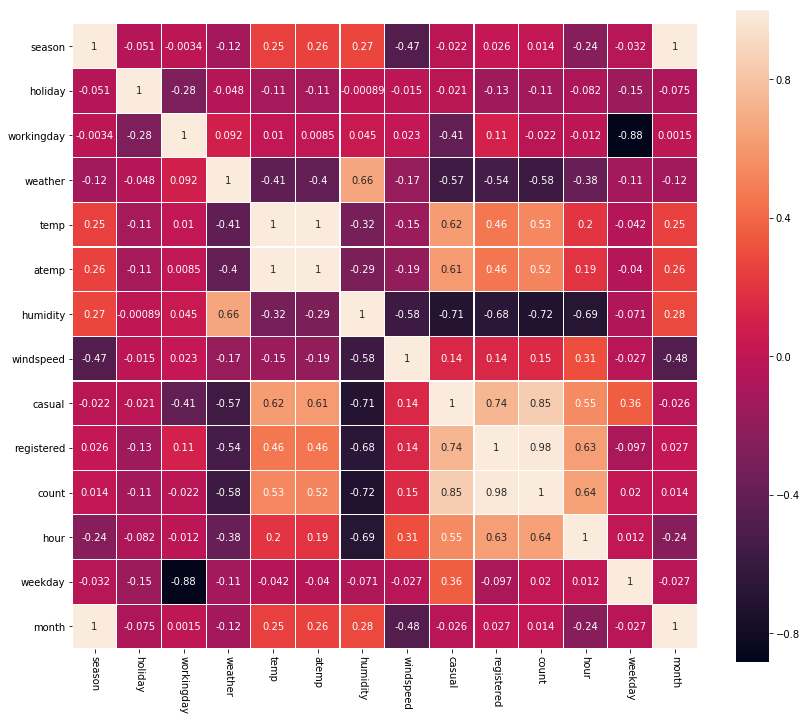

In [89]:
#使用热地图(heat map)更直观地展示系数矩阵情况
fig=plt.figure(figsize=(14,12))
sns.heatmap(correlation.astype(float).corr(),linewidths=0.1,vmax=1,square=True,linecolor='white',annot=True)
plt.xticks(rotation=270)

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]), <a list of 14 Text xticklabel objects>)

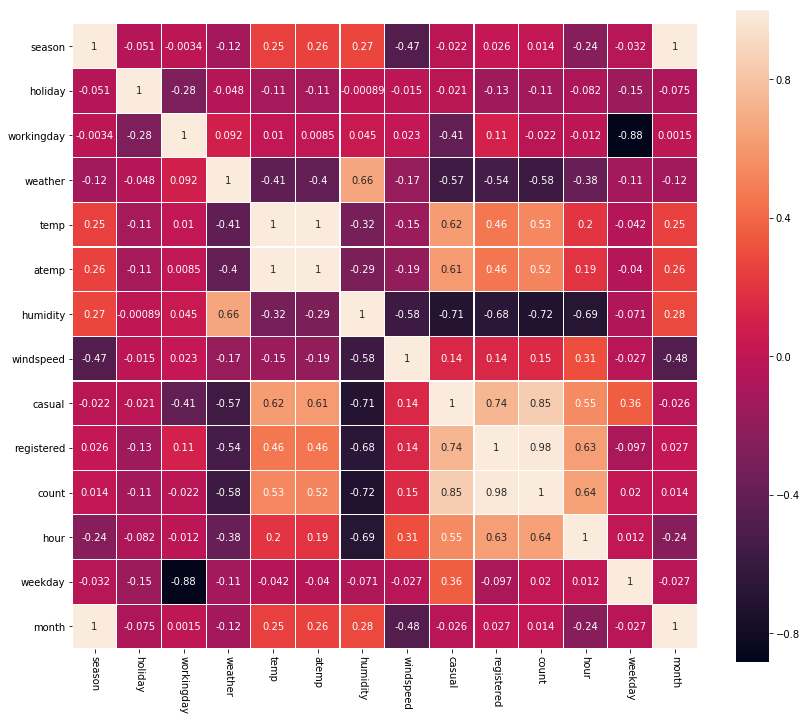

In [85]:
#使用热地图(heat map)更直观地展示系数矩阵情况
fig=plt.figure(figsize=(14,12))
sns.heatmap(correlation.astype(float).corr(),linewidths=0.1,vmax=1.0,square=True,linecolor='white',annot=True)
plt.xticks(rotation=270)

In [120]:
fig=plt.figure(figsize=(14,12))
fig

<Figure size 1008x864 with 0 Axes>

<Figure size 1008x864 with 0 Axes>

In [70]:
#原文链接：https://blog.csdn.net/weixin_39667003/article/details/86518673

[[0.77832121 0.74934798 0.31898381]
 [0.21626131 0.72978972 0.53235282]
 [0.90637953 0.79499671 0.92209798]]


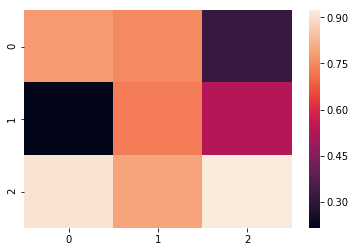

In [90]:
r = np.random.rand(3, 3)
print(r)
sns.heatmap(r)

[[0.85162332 0.66182902 0.31435697]
 [0.34588967 0.92729167 0.21980195]
 [0.59083171 0.3477656  0.7867283 ]]


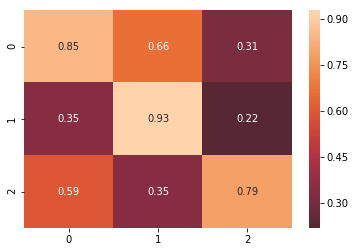

In [92]:
r = np.random.rand(3, 3)
print(r)
sns.heatmap(r,center=0,annot=True)

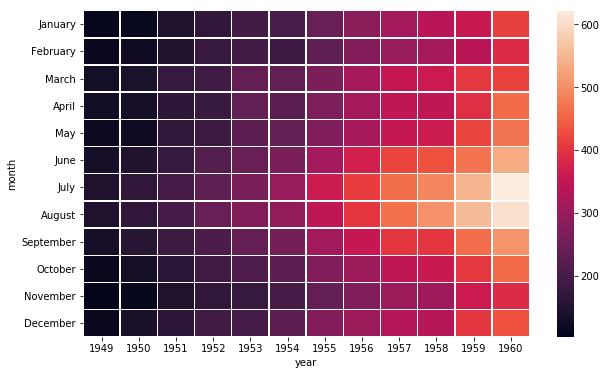

In [69]:
flights = sns.load_dataset('flights')
flights.head()
# pivot() 可以将dataframe转换为行列式矩阵 并指定每个元素的存储值
flights = flights.pivot(index='month', columns='year',  values='passengers')
# print(flights)
plt.figure(figsize=(10,6))
ax = sns.heatmap(flights, fmt='d', linewidths=.5)
# fmt设置字体模式  linewidth设置每个小方格的间距 线宽


[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Holiday'),
 Text(0.5, 1.0, 'box plot on count across workingday')]

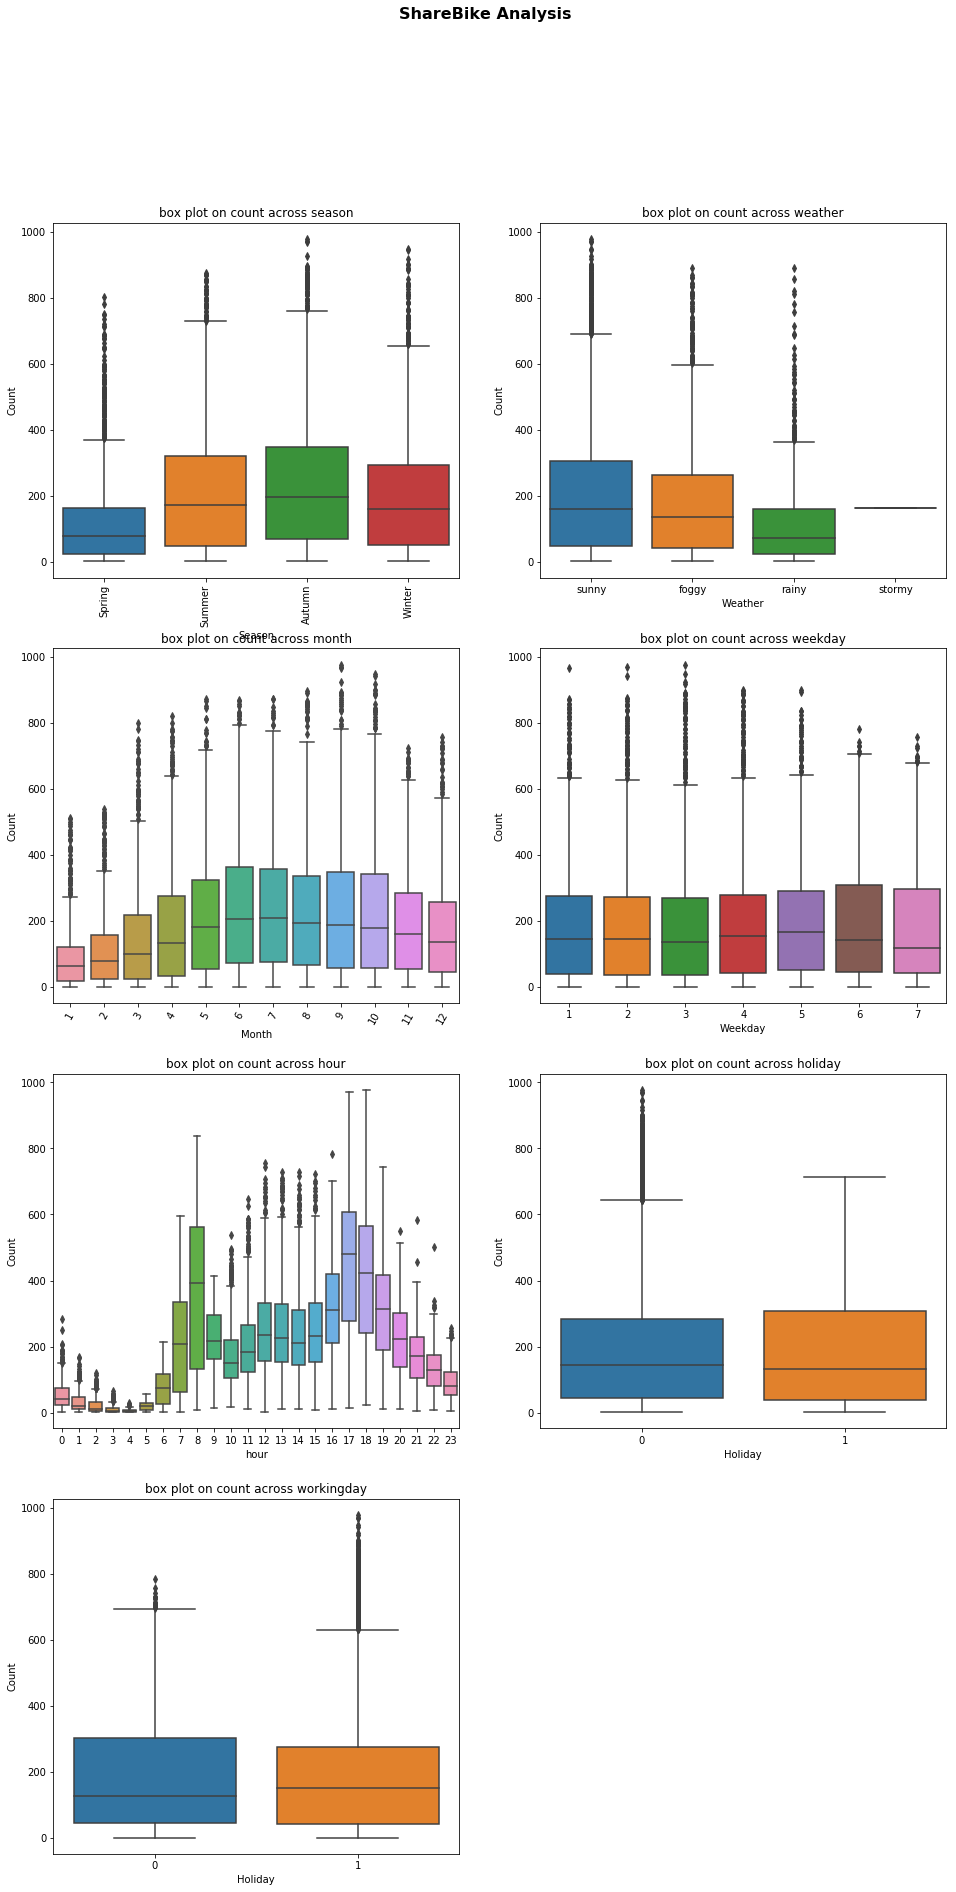

In [102]:
#绘制多图
fig=plt.figure(figsize=(16,30))
#设置图像大标题
fig.suptitle('ShareBike Analysis',fontsize=16,fontweight='bold')
#添加第一个子图，季节与租车人数的关系
Bikedata['season_word']=Bikedata['season'].map({1:'Spring',2:'Summer',3:'Autumn',4:'Winter'})
ax1=fig.add_subplot(4,2,1)
sns.boxplot(data=Bikedata,x='season_word',y='count')
ax1.set(xlabel='Season',ylabel='Count',title='box plot on count across season')
plt.xticks(rotation=90)
#添加第二个子图，天气与租车人数的关系
Bikedata['weather_word']=Bikedata['weather'].map({1:'sunny',2:'foggy',3:'rainy',4:'stormy'})
ax2=fig.add_subplot(4,2,2)
sns.boxplot(data=Bikedata,x='weather_word',y='count')
ax2.set(xlabel='Weather',ylabel='Count',title='box plot on count across weather')
#添加第三个子图，月份与租车人数的关系
ax3=fig.add_subplot(4,2,3)
sns.boxplot(data=Bikedata,x='month',y='count')
ax3.set(xlabel='Month',ylabel='Count',title='box plot on count across month')
plt.xticks(rotation=60)
#添加第四个子图，星期数与租车人数的关系
ax4=fig.add_subplot(4,2,4) 
sns.boxplot(data=Bikedata,x='weekday',y='count')
ax4.set(xlabel='Weekday',ylabel='Count',title='box plot on count across weekday')
#添加第五个子图，时间点与租车人数的关系
ax5=fig.add_subplot(4,2,5) 
sns.boxplot(data=Bikedata,x='hour',y='count')
ax5.set(xlabel='hour',ylabel='Count',title='box plot on count across hour')
#添加第六个子图，节假日与租车人数的关系
ax6=fig.add_subplot(4,2,6) 
sns.boxplot(data=Bikedata,x='holiday',y='count')
ax6.set(xlabel='Holiday',ylabel='Count',title='box plot on count across holiday')
#添加第七个子图，工作日与租车人数的关系
ax7=fig.add_subplot(4,2,7) 
sns.boxplot(data=Bikedata,x='workingday',y='count')
ax7.set(xlabel='Holiday',ylabel='Count',title='box plot on count across workingday')

(array([0, 1, 2, 3]), <a list of 4 Text xticklabel objects>)

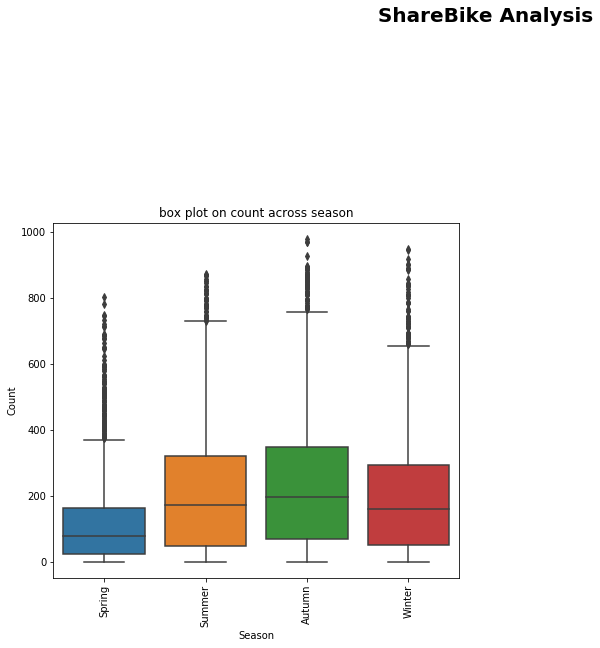

In [97]:
#绘制多图
fig=plt.figure(figsize=(16,30))
#设置图像大标题
fig.suptitle('ShareBike Analysis',fontsize=20,fontweight='bold')
#添加第一个子图，季节与租车人数的关系
Bikedata['season_word']=Bikedata['season'].map({1:'Spring',2:'Summer',3:'Autumn',4:'Winter'})
ax1=fig.add_subplot(4,2,1)
sns.boxplot(data=Bikedata,x='season_word',y='count')
ax1.set(xlabel='Season',ylabel='Count',title='box plot on count across season')
plt.xticks(rotation=90)

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Holiday'),
 Text(0.5, 1.0, 'box plot on count across workingday')]

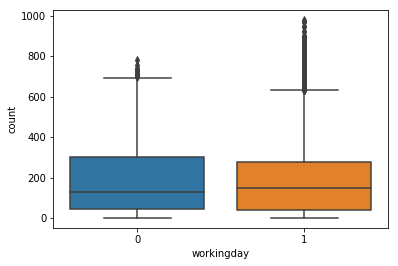

In [99]:
ax7=fig.add_subplot(4,2,7) 
sns.boxplot(data=Bikedata,x='workingday',y='count')
ax7.set(xlabel='Holiday',ylabel='Count',title='box plot on count across workingday')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


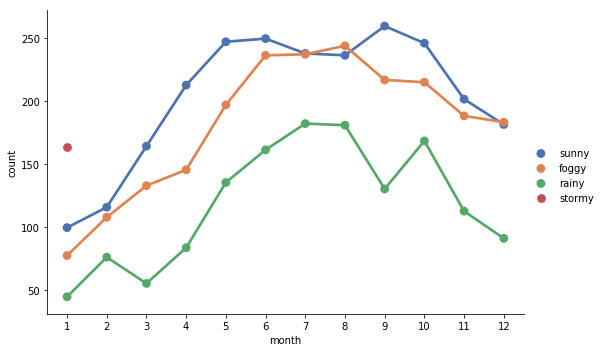

In [36]:
# 可视化呈现
sns.FacetGrid(data=Bikedata,size=5,aspect=1.5).map(sns.pointplot,'month','count','weather_word',\
hue_order=['sunny','foggy','rainy','stormy'],palette="deep",ci=None).add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


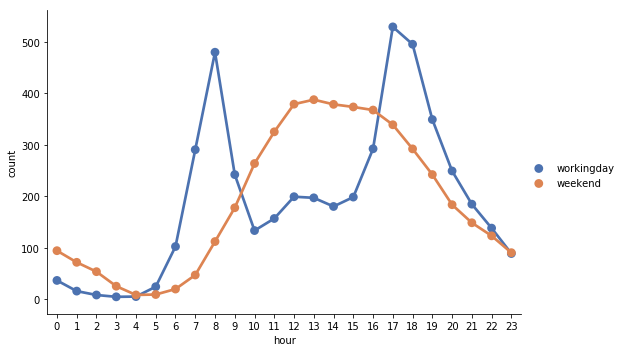

In [108]:
# 可视化呈现
import warnings
Bikedata['workingday_word']=Bikedata['workingday'].map({1:'workingday',0:'weekend'})
sns.FacetGrid(data=Bikedata,size=5,aspect=1.5).map(sns.pointplot,'hour','count','workingday_word',\
hue_order=['workingday','weekend'],palette="deep",ci=None).add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


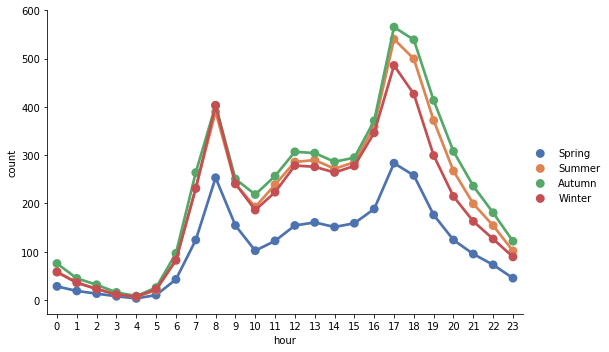

In [38]:
sns.FacetGrid(data=Bikedata,size=5,aspect=1.5).map(sns.pointplot,'hour','count','season_word',\
hue_order=['Spring','Summer','Autumn','Winter'],palette="deep",ci=None).add_legend()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


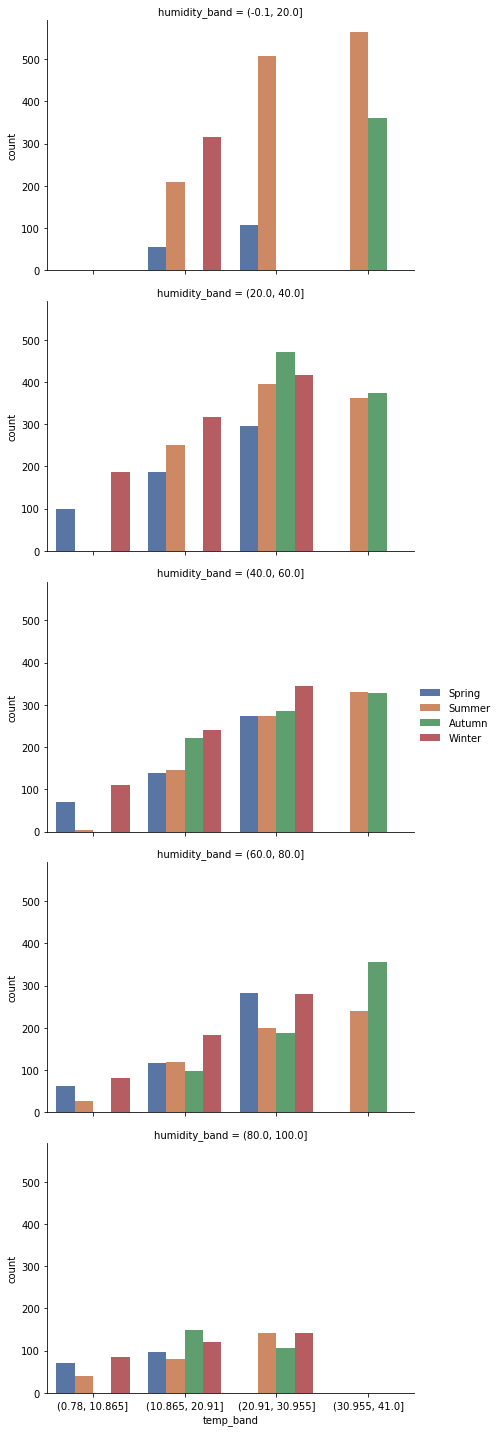

In [39]:
# 连续变量离散化
Bikedata['temp_band']=pd.cut(Bikedata['temp'],4)
Bikedata['humidity_band']=pd.cut(Bikedata['humidity'],5)
# 可视化呈现
sns.FacetGrid(data=Bikedata,size=4,aspect=1.5,row='humidity_band').map(sns.barplot,'temp_band','count','season_word',\
hue_order=['Spring','Summer','Autumn','Winter'],palette="deep",ci=None).add_legend()

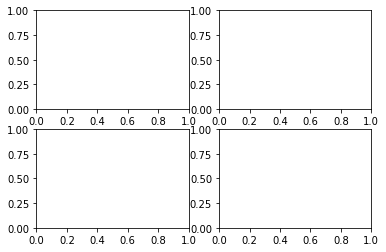

In [115]:
fig,axes=plt.subplots(2,2)


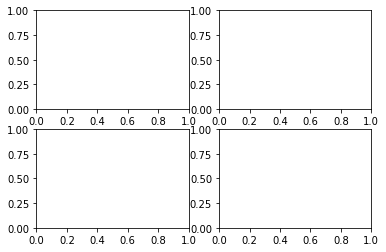

In [116]:
fig

In [118]:
axes[0,0]